In [1]:
!gdown --id 1QWiC8TMvnZ-XWscgb9l88-VdfSlyILAN

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QWiC8TMvnZ-XWscgb9l88-VdfSlyILAN
To: /content/healthcare-dataset-stroke-data.csv
100% 317k/317k [00:00<00:00, 84.3MB/s]


In [2]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## Context
Menurut Organisasi Kesehatan Dunia (WHO), stroke adalah penyebab kematian terbesar kedua secara global, bertanggung jawab atas sekitar 11% dari total kematian.
Dataset ini digunakan untuk memprediksi apakah seorang pasien kemungkinan akan mengalami stroke berdasarkan parameter-input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok. Setiap baris dalam data memberikan informasi relevan tentang pasien.

## Attribute Information
1. id: pengenal unik
2. gender: "Laki-laki", "Perempuan", atau "Lainnya"
3. age: usia pasien
4. hypertension: 0 jika pasien tidak memiliki hipertensi, 1 jika pasien memiliki hipertensi
5. heart_disease: 0 jika pasien tidak memiliki penyakit jantung, 1 jika pasien memiliki penyakit jantung
6. ever_married: "Tidak" atau "Ya"
7. work_type: "anak-anak", "Pekerjaan_Pemerintah", "Tidak_Pernah_Bekerja", "Swasta" atau "Wiraswasta"
8. Residence_type: "Pedesaan" atau "Perkotaan"
9. avg_glucose_level: rata-rata kadar glukosa dalam darah
10. bmi: indeks massa tubuh
11. smoking_status: "pernah merokok", "tidak pernah merokok", "merokok" atau "Tidak Diketahui"*
12. stroke: 1 jika pasien mengalami stroke atau 0 jika tidak
*Catatan: "Tidak Diketahui" dalam smoking_status berarti bahwa informasi tidak tersedia untuk pasien ini

## Acknowledgements
(Sumber Rahasia) - Gunakan hanya untuk tujuan pendidikan
Jika Anda menggunakan dataset ini dalam penelitian Anda, mohon memberikan kredit kepada penulisnya.

In [3]:
#cek data

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv',index_col = 'id')

In [4]:
df.head(7)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


Pertama-tama yang perlu dilakukan adalah membuat tipe data jenis kelamin menjadi angka agar dapat diolah oleh mesin.

In [5]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [6]:
df = df[df.gender != 'Other']

In [7]:
def getNumber(str):
    if str=="Female":
        return 0
    else:
        return 1

df["gender"]=df["gender"].apply(getNumber)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
Oleh karena tipe pekerjaan tipe Privat sangat banyak dibanding tipe pekerjaan yang lain, maka tipe data selain privat akan diberi label 0, sementara tipe data privat akan dilabeli 1.

In [9]:
df = df[df.work_type != 'Never_worked']
df['work_type'] = df['work_type'].replace(['Self-employed', 'children', 'Govt_job'], 0)
df['work_type'] = df['work_type'].replace(['Private'], 1)

In [10]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,Yes,1,Urban,228.69,36.6,formerly smoked,1
51676,0,61.0,0,0,Yes,0,Rural,202.21,NaN,never smoked,1
31112,1,80.0,0,1,Yes,1,Rural,105.92,32.5,never smoked,1
60182,0,49.0,0,0,Yes,1,Urban,171.23,34.4,smokes,1
1665,0,79.0,1,0,Yes,0,Rural,174.12,24.0,never smoked,1
56669,1,81.0,0,0,Yes,1,Urban,186.21,29.0,formerly smoked,1
53882,1,74.0,1,1,Yes,1,Rural,70.09,27.4,never smoked,1
10434,0,69.0,0,0,No,1,Urban,94.39,22.8,never smoked,1
27419,0,59.0,0,0,Yes,1,Rural,76.15,NaN,Unknown,1


In [11]:
df['Residence_type'].value_counts()

Urban    2581
Rural    2506
Name: Residence_type, dtype: int64

Selanjutnya, mari kita ubah data tipe tempat tinggal dengan 0 untuk pedesaan dan 1 untuk perkotaan

In [12]:
def getNumber(str):
    if str=="Rural":
        return 0
    else:
        return 1

df["Residence_type"]=df["Residence_type"].apply(getNumber)

df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,Yes,1,1,228.69,36.6,formerly smoked,1


Kemudian mengubah data sudah status pernikahan menjadi angka

In [13]:
def getNumber(str):
    if str=="No":
        return 0
    else:
        return 1

df["ever_married"]=df["ever_married"].apply(getNumber)

df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,1,1,228.69,36.6,formerly smoked,1


In [14]:
df['smoking_status'].value_counts()

never smoked       1878
Unknown            1536
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

Oleh karena status perokok ditemukan banyak data kosong (Unknown) maka diputuskan untuk membuang kolom status perokok.

In [15]:
# smoking status dibuang karena data kosongnya mendekati 30% dari total data
del df["smoking_status"]

# Preprocessing

Proses selanjutnya, membuang data yang hilang.

In [16]:
missing_value = 100* df.isnull().sum()/ len(df)
missing_value

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.951248
stroke               0.000000
dtype: float64

In [17]:
df.dropna(inplace=True)

In [18]:
missing_value = 100* df.isnull().sum()/ len(df)
missing_value

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
stroke               0.0
dtype: float64

In [19]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
id,,,,,,,,,,
9046,1,67.0,0,1,1,1,1,228.69,36.6,1
31112,1,80.0,0,1,1,1,0,105.92,32.5,1
60182,0,49.0,0,0,1,1,1,171.23,34.4,1
1665,0,79.0,1,0,1,0,0,174.12,24.0,1
56669,1,81.0,0,0,1,1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
14180,0,13.0,0,0,0,0,0,103.08,18.6,0
44873,0,81.0,0,0,1,0,1,125.20,40.0,0
19723,0,35.0,0,0,1,0,0,82.99,30.6,0


# Visualisasi

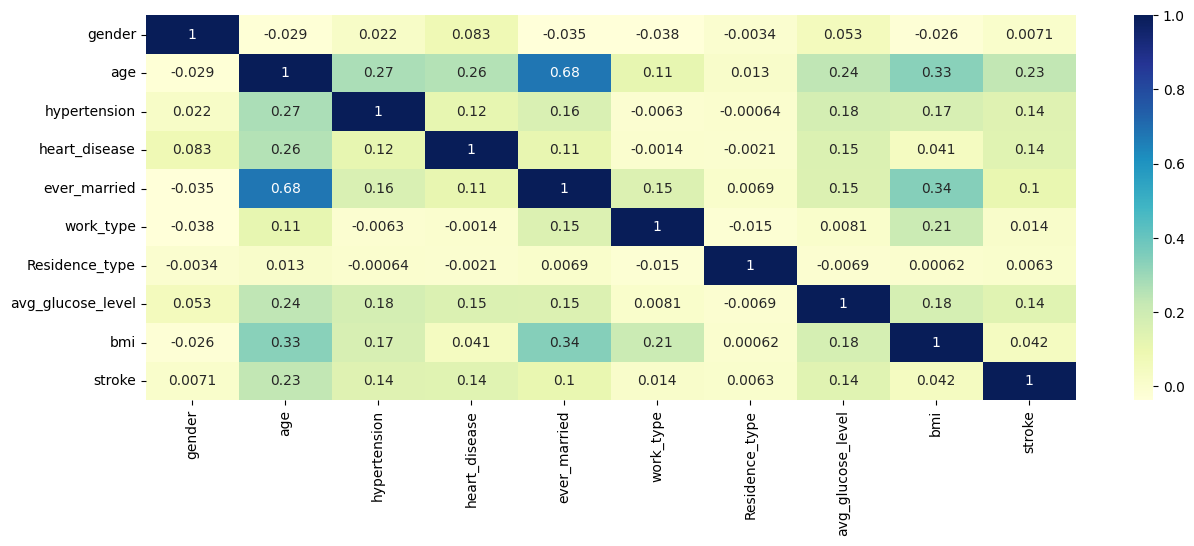

In [20]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

In [21]:
cols = ['age','avg_glucose_level','bmi']

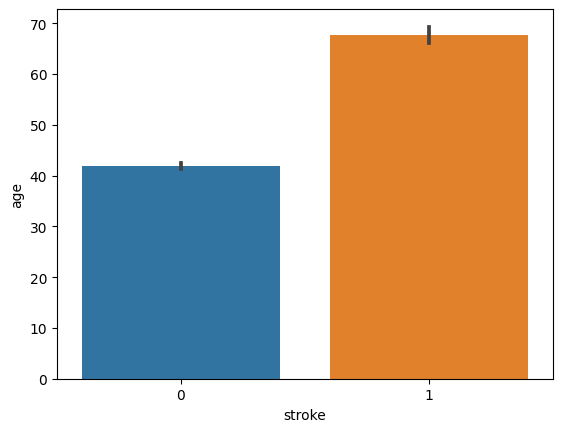

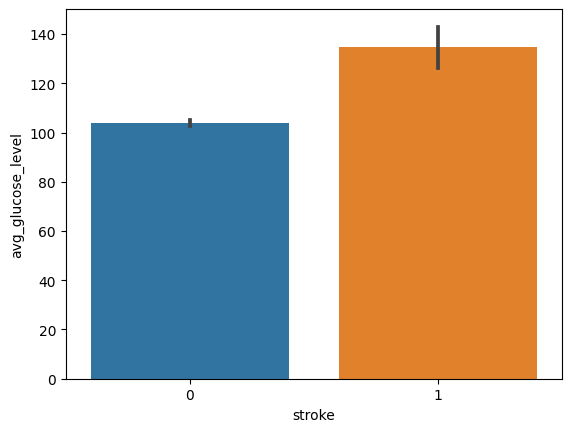

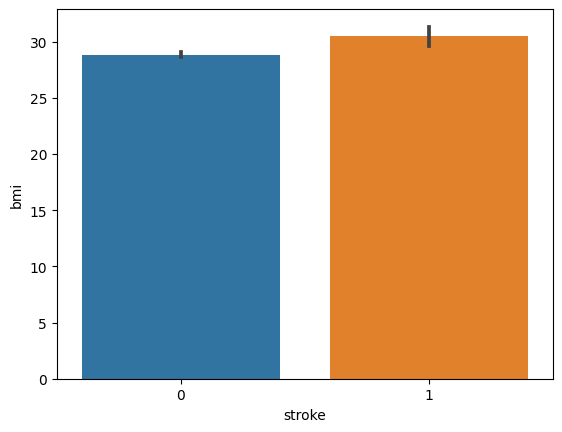

In [22]:
for i in cols:
  sns.barplot(x = 'stroke',
              y = i,
              data = df)
  plt.show()

# Modelling

In [23]:
x = df.drop(['stroke'], axis=1).values
y = df['stroke'].values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=44)

In [25]:
dt = DecisionTreeClassifier(max_depth=4)
dt

DecisionTreeClassifier(max_depth=4)

In [26]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [27]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
#menampilkan akurasi

print(f'Akurasi : {accuracy_score(y_test, y_pred)}')

Akurasi : 0.9631901840490797


# Simulasi

In [29]:
gender = input("Masukan jenis kelamin pasien (perempuan = 0; laki-laki = 1) =")
age = input("Masukan usia pasien = ")
hypertension = input("Apakah pasien memiliki hipertensi? (tidak = 0; ya = 1) = ")
heart_disease = input("Apakah pasien memiliki penyakit jantung? (tidak = 0; ya = 1) = ")
ever_married	 = input("Apakah pasien pernah menikah? (tidak = 0; ya = 1) = ")
work_type = input("Apakah pasien bekerja di sektor privat? (tidak = 0; ya = 1) = ")
Residence_type = input("Apakah pasien tinggal di perkotaan? (0 = tidak; 1 = ya) = ")
avg_glucose_level = input("Masukan nilai kadar gula dalam darah pasien = ")
bmi	 = input("Masukan nilai BMI pasien = ")

input_user = {'gender':gender,
        'age':age,
        'hypertension':hypertension,
        'heart_disease':heart_disease,
        'ever_married': ever_married,
        'work_type':work_type,
        'Residence_type':Residence_type,
        'avg_glucose_level':avg_glucose_level,
        'bmi':bmi
        }

check_input = pd.DataFrame(input_user, index=[0])
template_output = "Prediksi hujan dengan kriteria tersebut adalah"
diagnosis_stroke = dt.predict(check_input)
if(diagnosis_stroke == 1):
    print("\n \033[1m" +"Kemungkinan besar pasien akan memiliki stroke di masa depan." + "\033[0m")
else:
  print("\n \033[1m" +"Pasien aman dari ancaman stroke." + "\033[0m" )

Masukan jenis kelamin pasien (perempuan = 0; laki-laki = 1) =1
Masukan usia pasien = 29
Apakah pasien memiliki hipertensi? (tidak = 0; ya = 1) = 1
Apakah pasien memiliki penyakit jantung? (tidak = 0; ya = 1) = 1
Apakah pasien pernah menikah? (tidak = 0; ya = 1) = 1
Apakah pasien bekerja di sektor privat? (tidak = 0; ya = 1) = 1
Apakah pasien tinggal di perkotaan? (0 = tidak; 1 = ya) = 1
Masukan nilai kadar gula dalam darah pasien = 24
Masukan nilai BMI pasien = 36

 Pasien aman dari ancaman stroke.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
